In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [142]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [143]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Exploratory Analysis of selected variables:**

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Distinction between categorical and numerical columns:**

In [146]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
numerical variables:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


**Unique values:**

In [147]:
df.nunique(axis=0)

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

**We can convert few columns into categorical. It will be helpful during our analysis.**

In [148]:
cats.append('Transported') # let's pretend there are more variables than 1 column
nums.remove('Transported')

**Inspect nans of the data**

In [149]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [150]:
df[df.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [151]:
df[df['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


**For every column NaN values are around 2.5%. For the sake of data analysis we could drop them.
Later in modelling I will use their means.**

In [152]:
df.isna().sum().sum()

2324

In [153]:
df.dropna(inplace = True)

In [154]:
#df.reset_index(inplace=True)
# df = df.drop(['level_0','index'], axis=1)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [155]:
# duplicates
df = df[~df.duplicated()]
df.shape

(6606, 14)

**Analysis on Categorical Attributes**

Descriptive stats and EDA

In [156]:
df_cat = df[cats]
df_cat.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True


**Preprocessing:**

In [157]:
# replace any space like character with the space
def whitespaceOnly(text):
    return ' '.join(text.split())

for col in ['Destination', 'Name']:
    #df_cat[col] = ''.join(str(df_cat[col]).split())
    df_cat[col].apply(whitespaceOnly)

In [158]:
df_cat

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


In [159]:
print(f"categories in origin: {pd.unique(df_cat['HomePlanet'])}")
print(f"categories in cylinders: {pd.unique(df_cat['Destination'])}")

categories in origin: ['Europa' 'Earth' 'Mars']
categories in cylinders: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [160]:
df_cat.describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,6606,6606,6606,6606,6606,6606,6606,6606
unique,6606,3,2,5305,3,2,6590,2
top,0001_01,Earth,False,G/1476/S,TRAPPIST-1e,False,Gwendy Sykess,True
freq,1,3566,4274,7,4576,6444,2,3327


**Analysis of distributions**

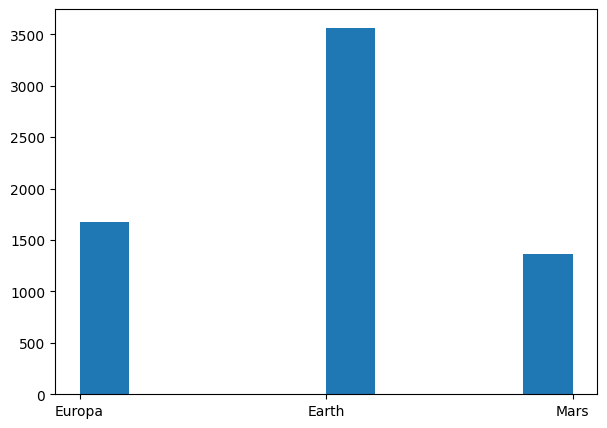

In [161]:
fig = plt.figure(1, (7, 5))
plt.hist(df_cat['HomePlanet'])
plt.show()

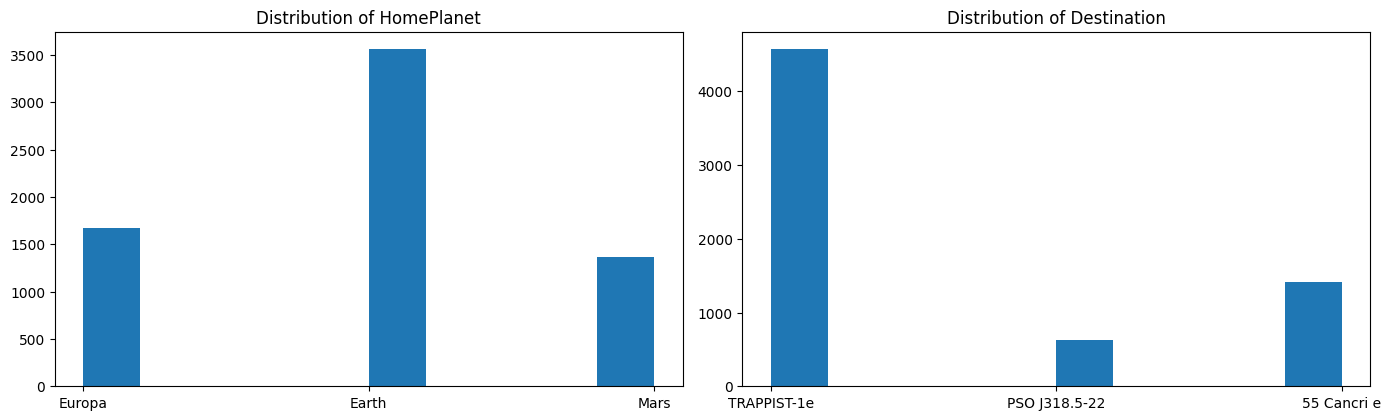

In [162]:
# In case of categorical variables an ideal (or atleast loved) 
# distribution is uniform or uniform-like.
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.drop(['Name','PassengerId','Cabin', 'Transported','CryoSleep','VIP'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    plt.hist(df_cat[cat])
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

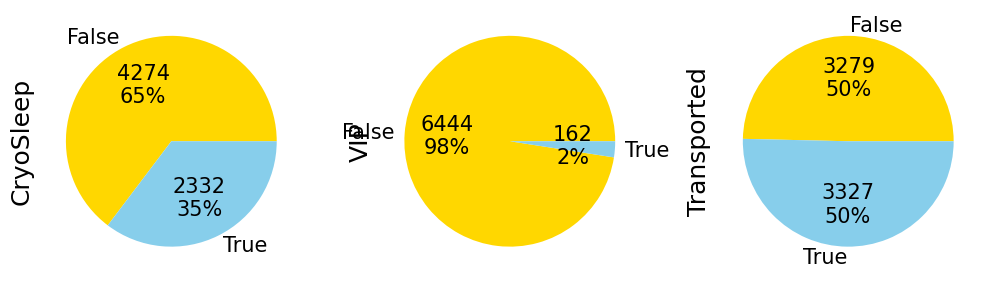

In [163]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 5))
df_cat.groupby('CryoSleep').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                  colors=['gold', 'skyblue'], ax=ax1)
df_cat.groupby('VIP').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                  colors=['gold', 'skyblue'], ax=ax2)
df_cat.groupby('Transported').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                  colors=['gold', 'skyblue'], ax=ax3)
ax1.set_ylabel('CryoSleep', size=18)
ax2.set_ylabel('VIP', size=18)
ax3.set_ylabel('Transported', size=18)
plt.tight_layout()
plt.show()

In [164]:
# calculate proportion of dominant classes in each category
for i,cat in enumerate(df_cat.drop(['Name','PassengerId','Cabin', 'Transported','CryoSleep','VIP'], axis=1).columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / df_cat.shape[0]
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')
    

`Earth` alone contributes to 53.98% of HomePlanet
`TRAPPIST-1e` alone contributes to 69.27% of Destination


In [165]:
# CryoSleep and Transported are balanced, the rest are highly inbalanced.

**Now we will analyze how different features behaves on changing other features.**

In [166]:
combos = itertools.combinations(['HomePlanet', 'Destination', 'CryoSleep','VIP', 'Transported'], 2)

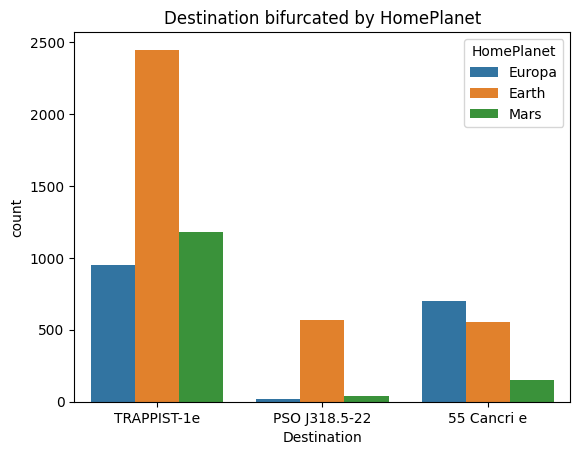

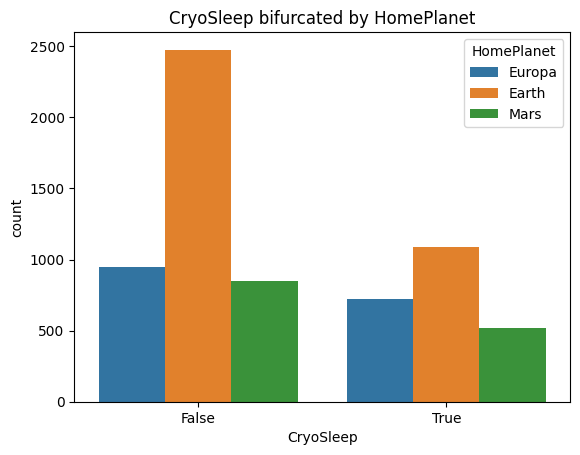

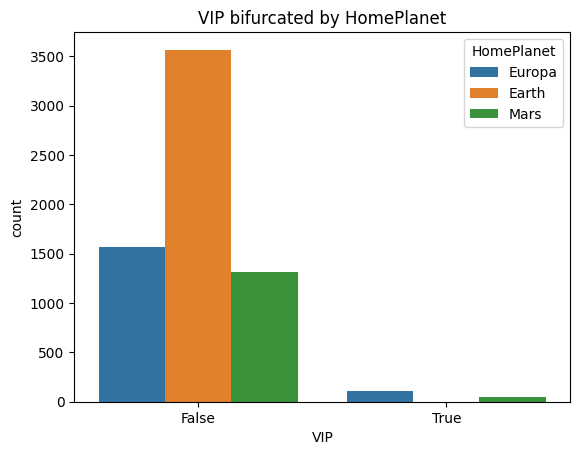

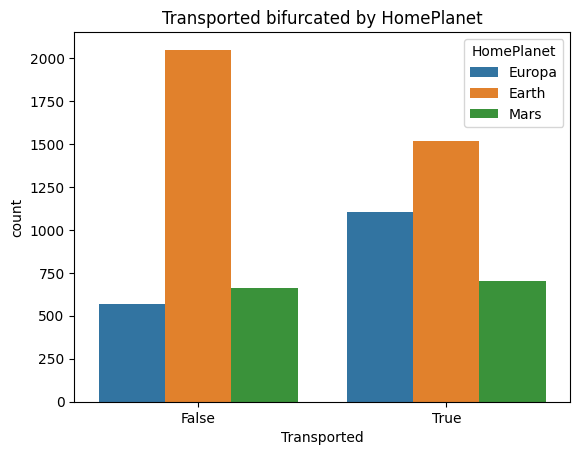

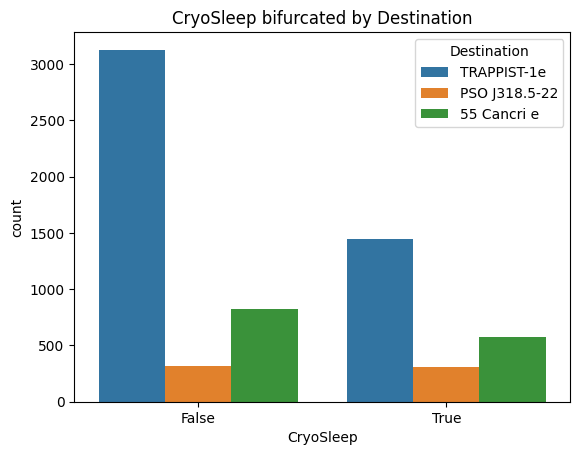

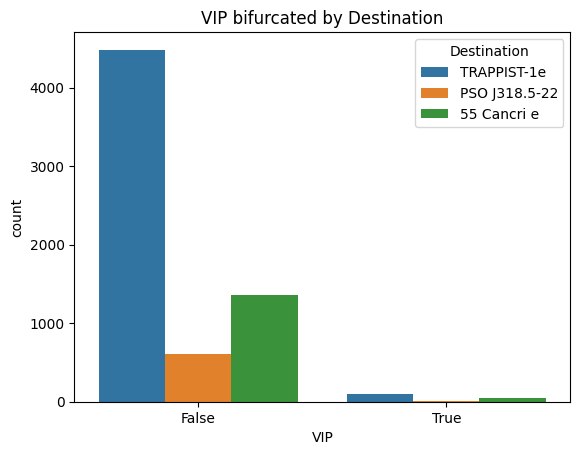

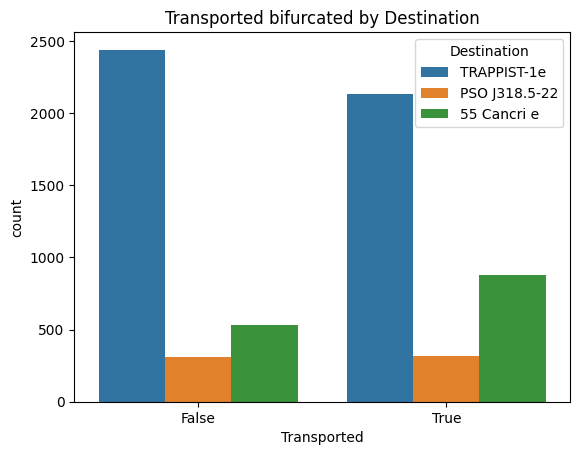

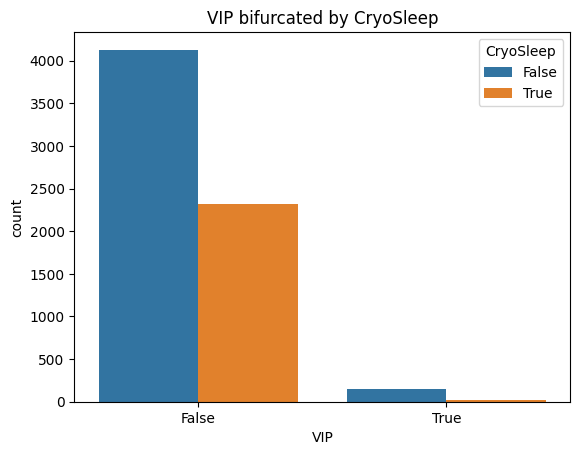

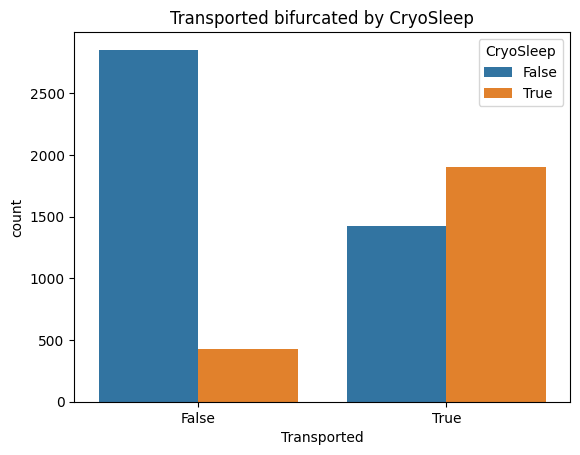

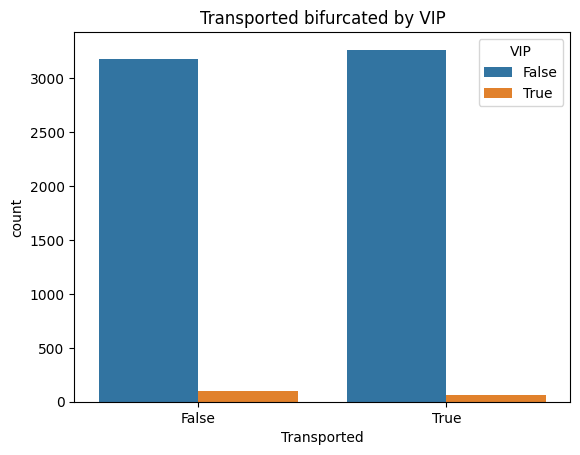

In [167]:
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=2, nrows = 5, figsize=(10, 5))
#fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(ncols=1, nrows = 10, figsize=(10, 5))
#fig, axs = plt.subplots(ncols=1, nrows = 10, figsize=(5, 5))

i = 0
for pair in combos:
    plt.figure(i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat).set(title = f'{pair[1]} bifurcated by {pair[0]}')
    i+=1

**Conclusions:**

Parameters that rely on each other: (at least we could conclude that)
* Transported by CryoSleep - people in CryoSleep were much likely to be Transported
* VIP by CryoSleep - VIPs are less likely to be in CryoSleep
* VIP by HomePlanet - almost no VIPs from Earth
* Destination by HomePlanet - Almost only Earth People goes to PSO, Europa people have greater probability of going to Canci, even though they are fewer. Most of Earth people goes to Trappist.

**Analysis on Numerical Attributes**

In [168]:
df_num = df[nums]
df_num.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


**Dsitributions:**

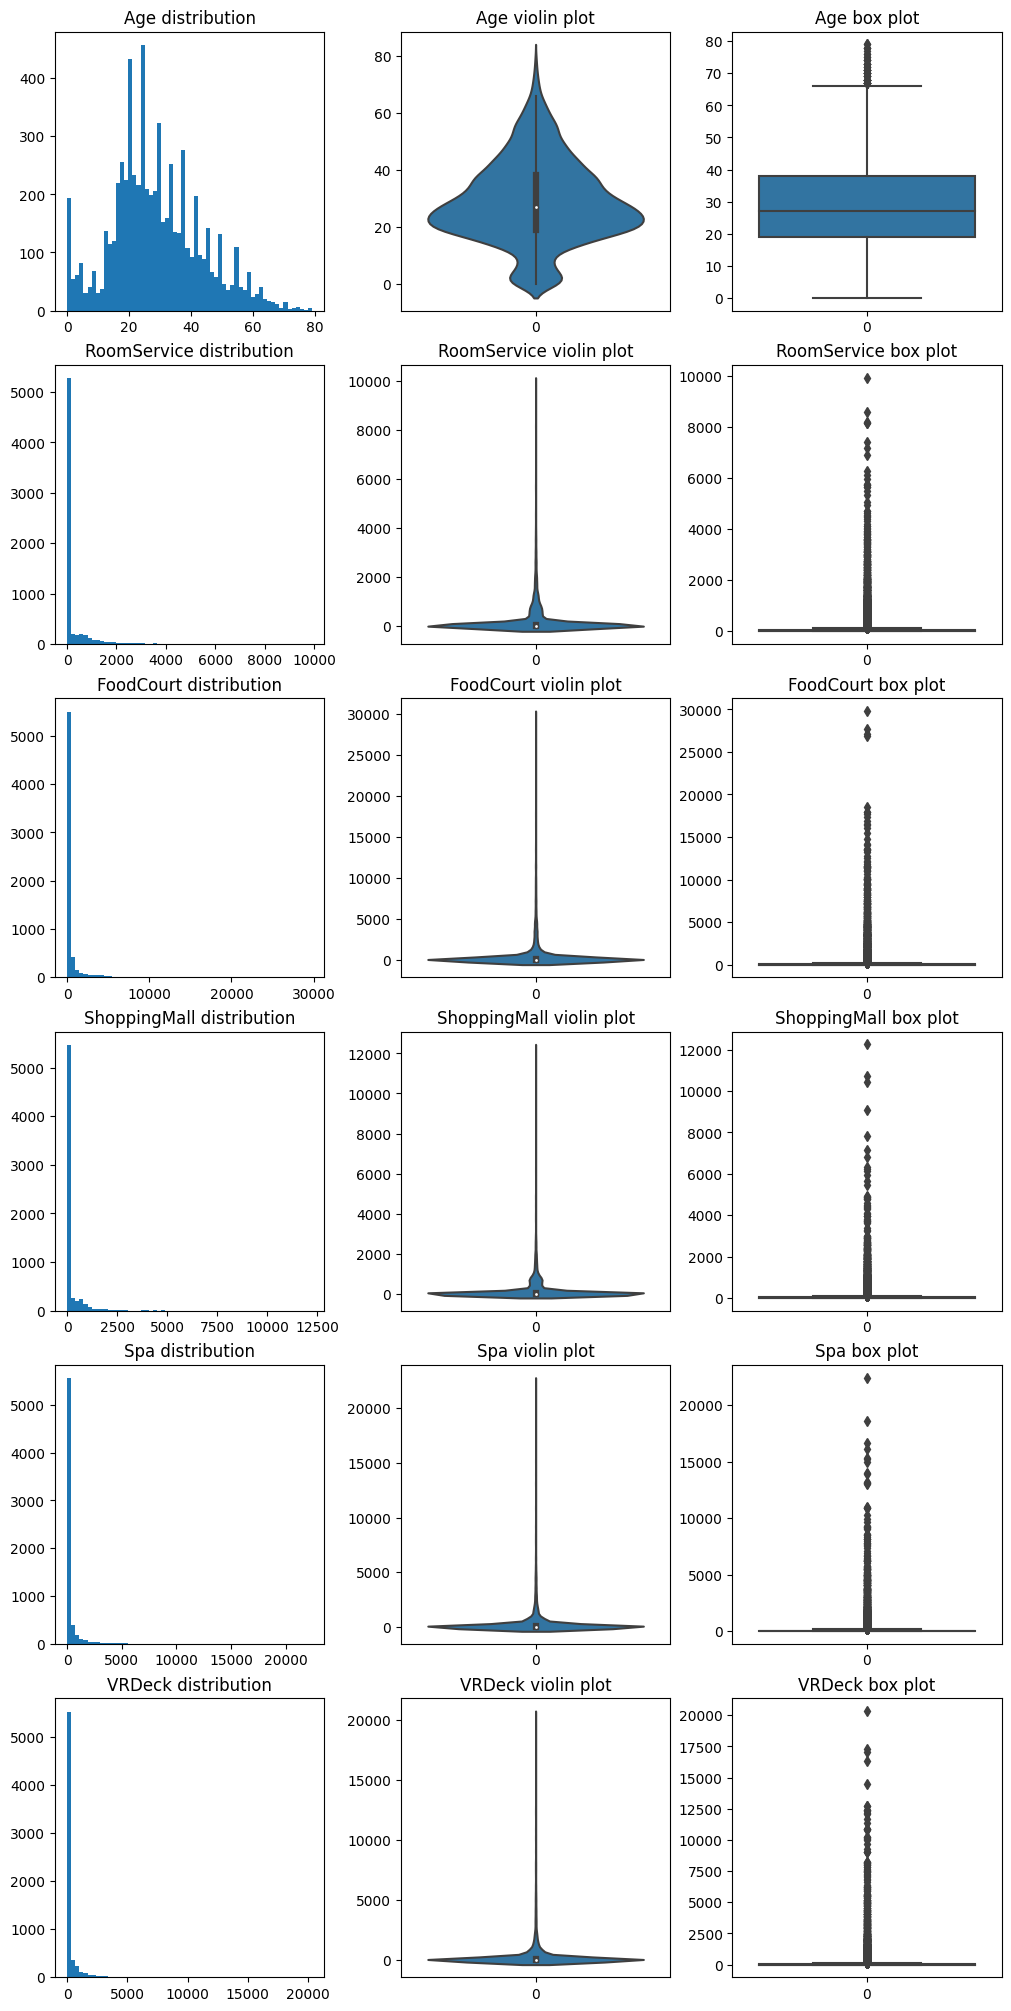

In [169]:
rows = len(nums)
cols = 3
fig, axs = plt.subplots(rows, 3, constrained_layout=True, figsize=(10,20))
axes = axs.T.ravel()

i=0
for col in df_num.columns:
    i+=1
    ax = plt.subplot(rows, cols,i)
    plt.hist(df_num[col], bins = 60)
    ax.set_xlabel(None)
    ax.set_title(f'{col} distribution')
    
    i+=1
    ax = plt.subplot(rows, cols,i)
    sns.violinplot(df_num[col])
    ax.set_xlabel(None)
    ax.set_title(f'{col} violin plot')
    
    i+=1
    ax = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col])
    ax.set_xlabel(None)
    ax.set_title(f'{col} box plot')

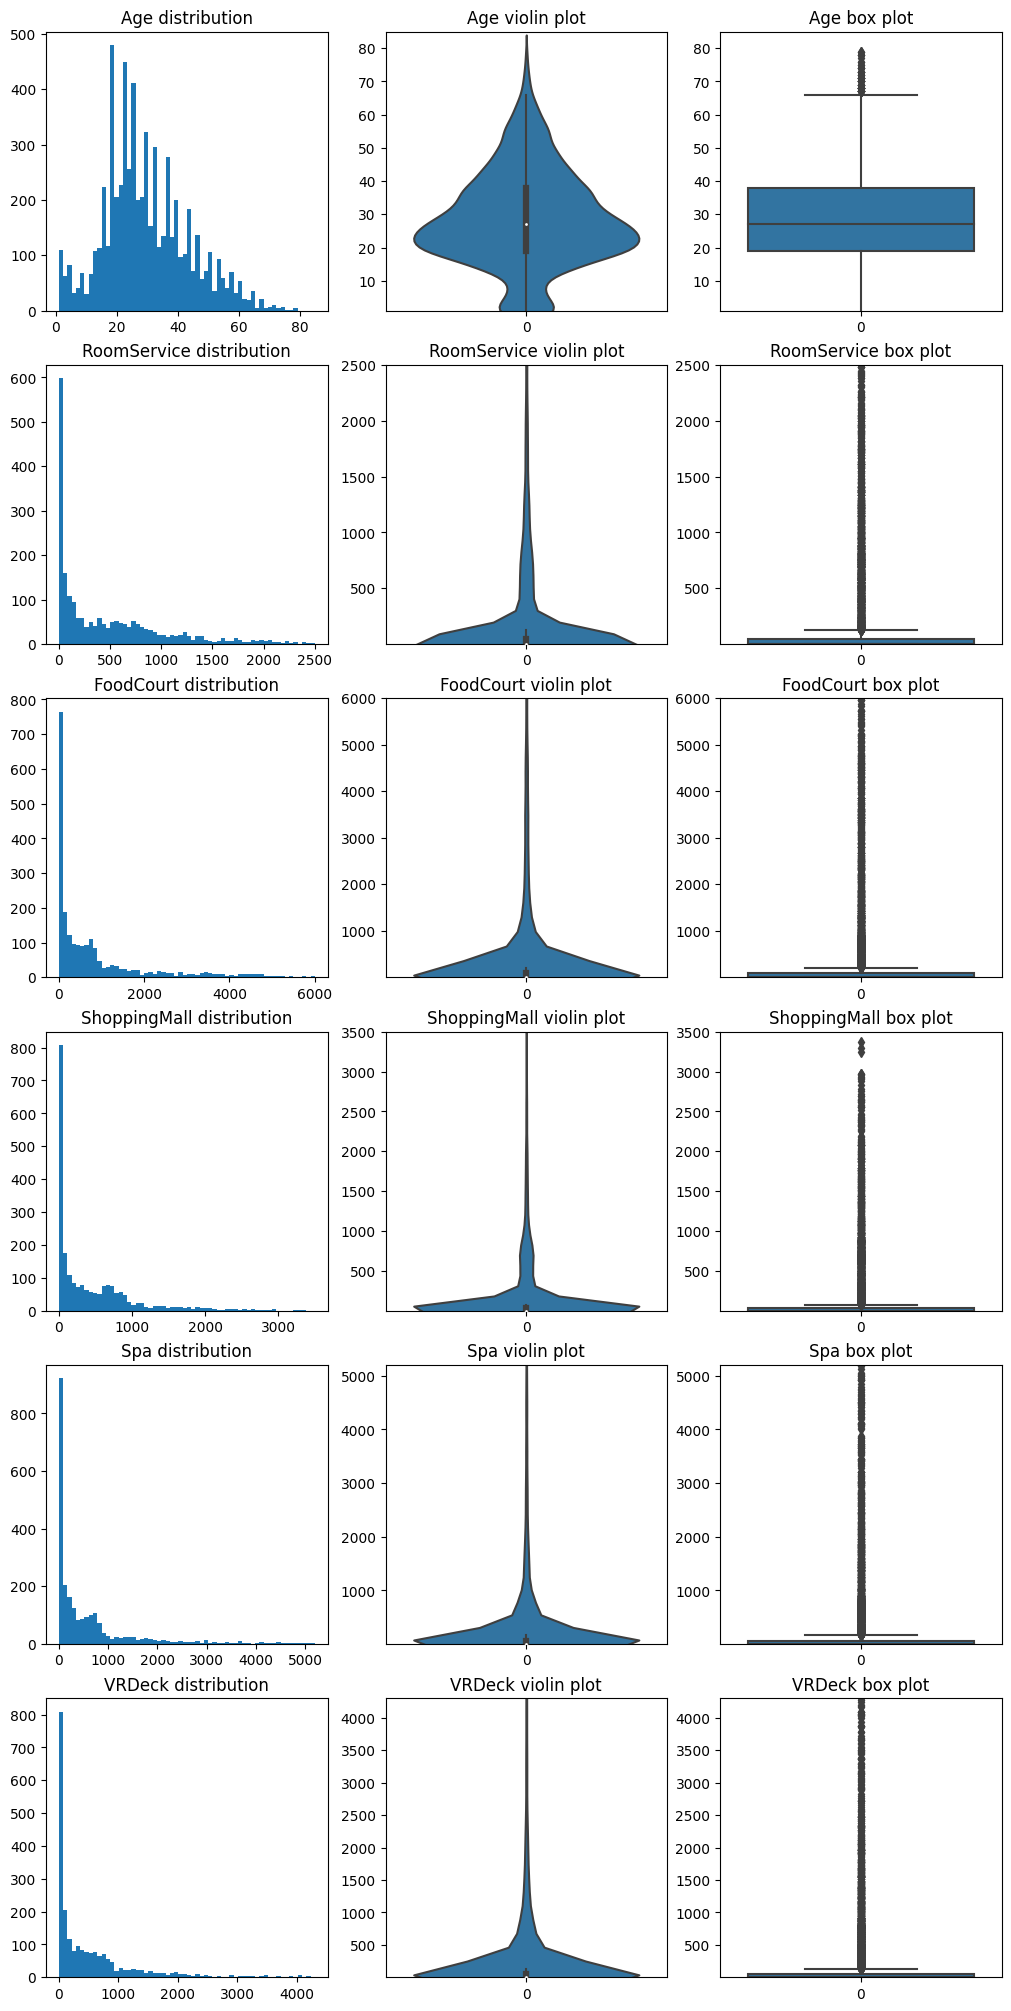

In [170]:
# We could try it again but limit a range a little bit. 
import math
fig, axs = plt.subplots(rows, 3, constrained_layout=True, figsize=(10,20))
ranges = [85, 2500, 6000, 3500, 5200, 4300]
lower_range = 1
i=0
for col in df_num.columns:
    i+=1
    xrange = ranges[math.floor(i/3)]
    ax = plt.subplot(rows, cols,i)
    plt.hist(df_num[col], bins = 60, range = (lower_range, xrange))
    ax.set_xlabel(None)
    ax.set_title(f'{col} distribution')
    
    i+=1
    ax = plt.subplot(rows, cols,i)
    sns.violinplot(df_num[col])
    ax.set_xlabel(None)
    ax.set_title(f'{col} violin plot')
    ax.set_ylim(lower_range, xrange)
    
    i+=1
    ax = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col])
    ax.set_xlabel(None)
    ax.set_title(f'{col} box plot')
    ax.set_ylim(lower_range, xrange)

Even after lowering the range and setting lower range to 1 - to exclude cases when somebody does not use Spa - non of the distribution is gaussian. We can see there are many outliers, but let's list them.

In [171]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    # outliers = x[(x<min_range) | (x>max_range)]
    upper = len(x[x>max_range])
    lower = len(x[x<min_range])
    return upper, lower
  
for col in df_num.columns:
    upper, lower = tukey_outliers(df_num[col])
    if max(upper, lower)!=0:
        print(f"* {col} has that much tukey upper outliers,\n{upper}\n")
        print(f"* {col} has that much tukey lower outliers,\n{lower}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* Age has that much tukey upper outliers,
62

* Age has that much tukey lower outliers,
0

* RoomService has that much tukey upper outliers,
1431

* RoomService has that much tukey lower outliers,
0

* FoodCourt has that much tukey upper outliers,
1407

* FoodCourt has that much tukey lower outliers,
0

* ShoppingMall has that much tukey upper outliers,
1413

* ShoppingMall has that much tukey lower outliers,
0

* Spa has that much tukey upper outliers,
1389

* Spa has that much tukey lower outliers,
0

* VRDeck has that much tukey upper outliers,
1378

* VRDeck has that much tukey lower outliers,
0



We can see that no column has lower outliers. It is because there is massive density near 0 - at the beginning of the x axis. Every parameter except 'Age' has similar distribution.

**Now we analyze relationship between different numerical attributes**

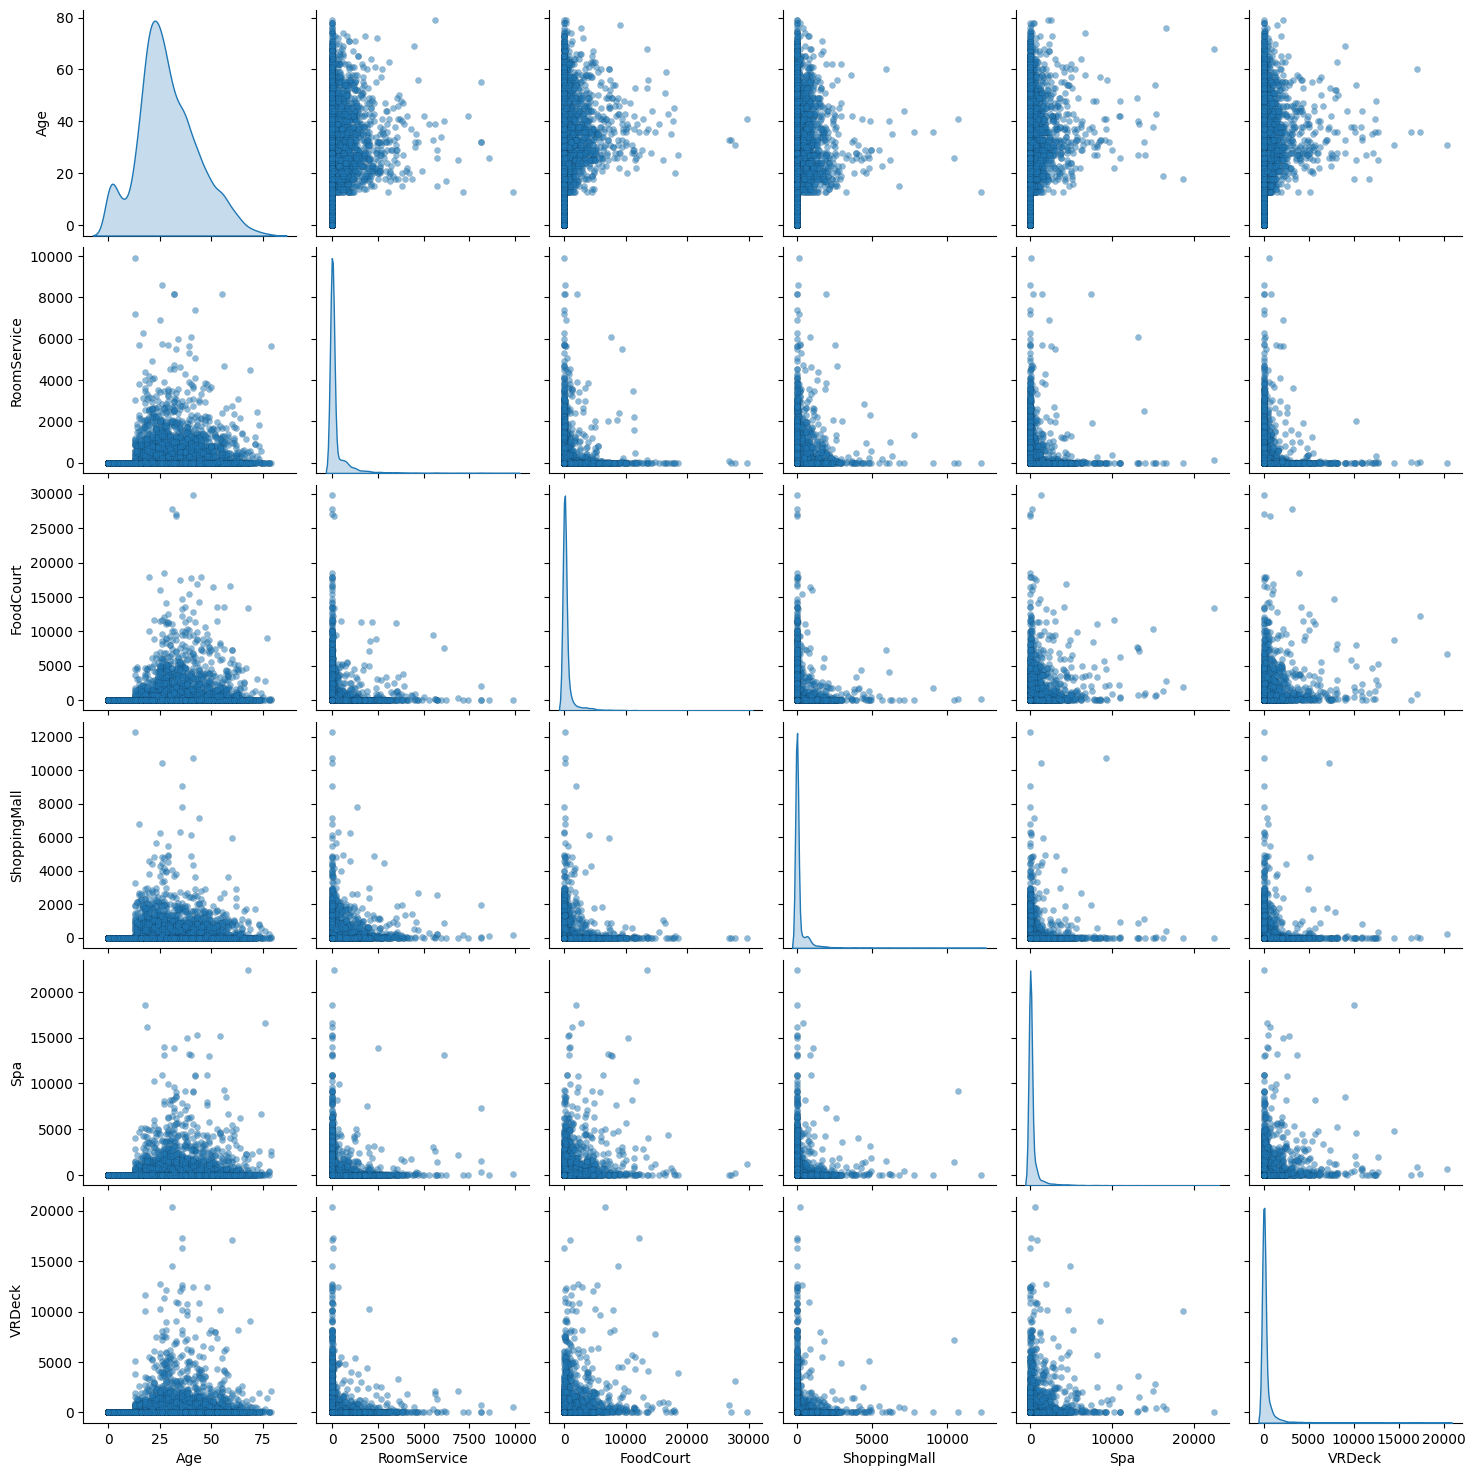

In [172]:
sns.pairplot(data=df, vars=nums, diag_kind='kde', 
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))
plt.show()

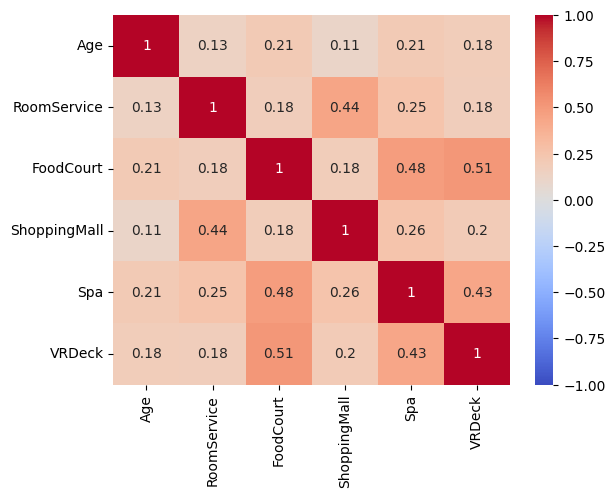

In [173]:
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

We can see that almost all parameters have little correlation.

When shoppingMall increases RoomService increses as well.

FoodCount is positively correlated with Spa and CVDeck.

Spa is related with VRDeck also.


Bifurcating FoodCourt and VRDeck by VIP, Transported and CryoSleep:


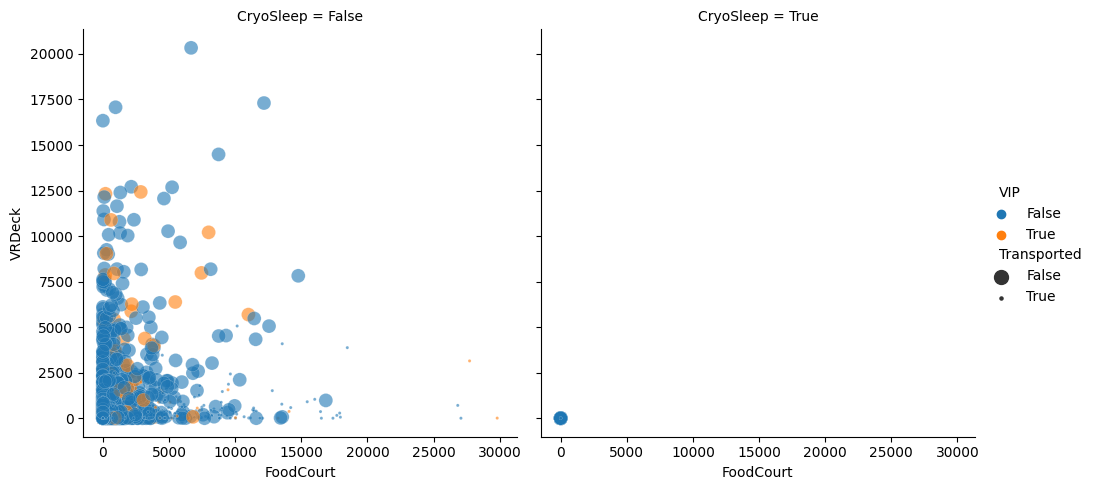

In [174]:
sns.relplot(x='FoodCourt', y='VRDeck', hue='VIP', #style='mpg_level',
            size='Transported', col='CryoSleep', data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

As we can see if somebody is in CryoSleep he doesn't use FoodCourt and VRDeck.

Let's check it differently to see relation between CryoSleep and VIP and Transported.

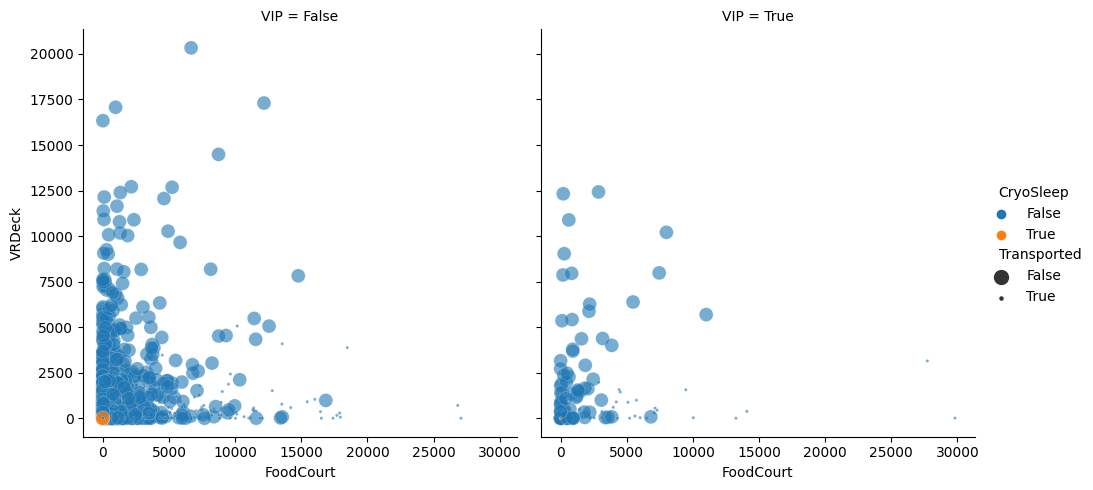

In [175]:
sns.relplot(x='FoodCourt', y='VRDeck', hue='CryoSleep', #style='mpg_level',
            size='Transported', col='VIP', data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

We can see some outliers on nums axis. 
The most person eats the greater chance of surviving ? Just kidding haha. Unless...

**Analysis of relationship between numerical and categorical attributes**

Variation of numerical parameters with Transported:

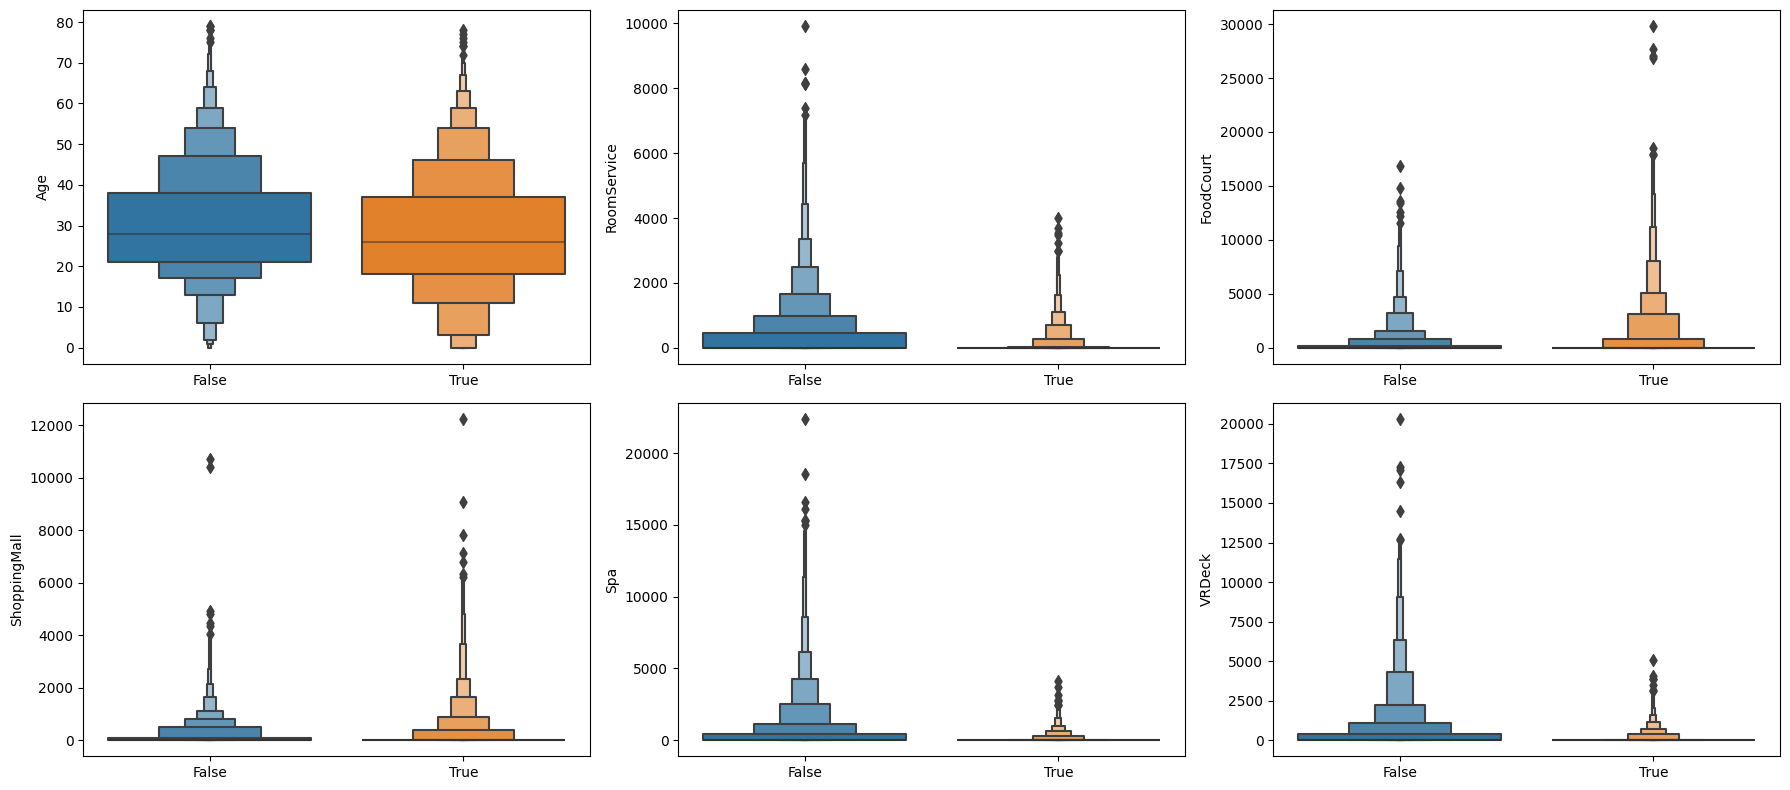

In [176]:
fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='Transported', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

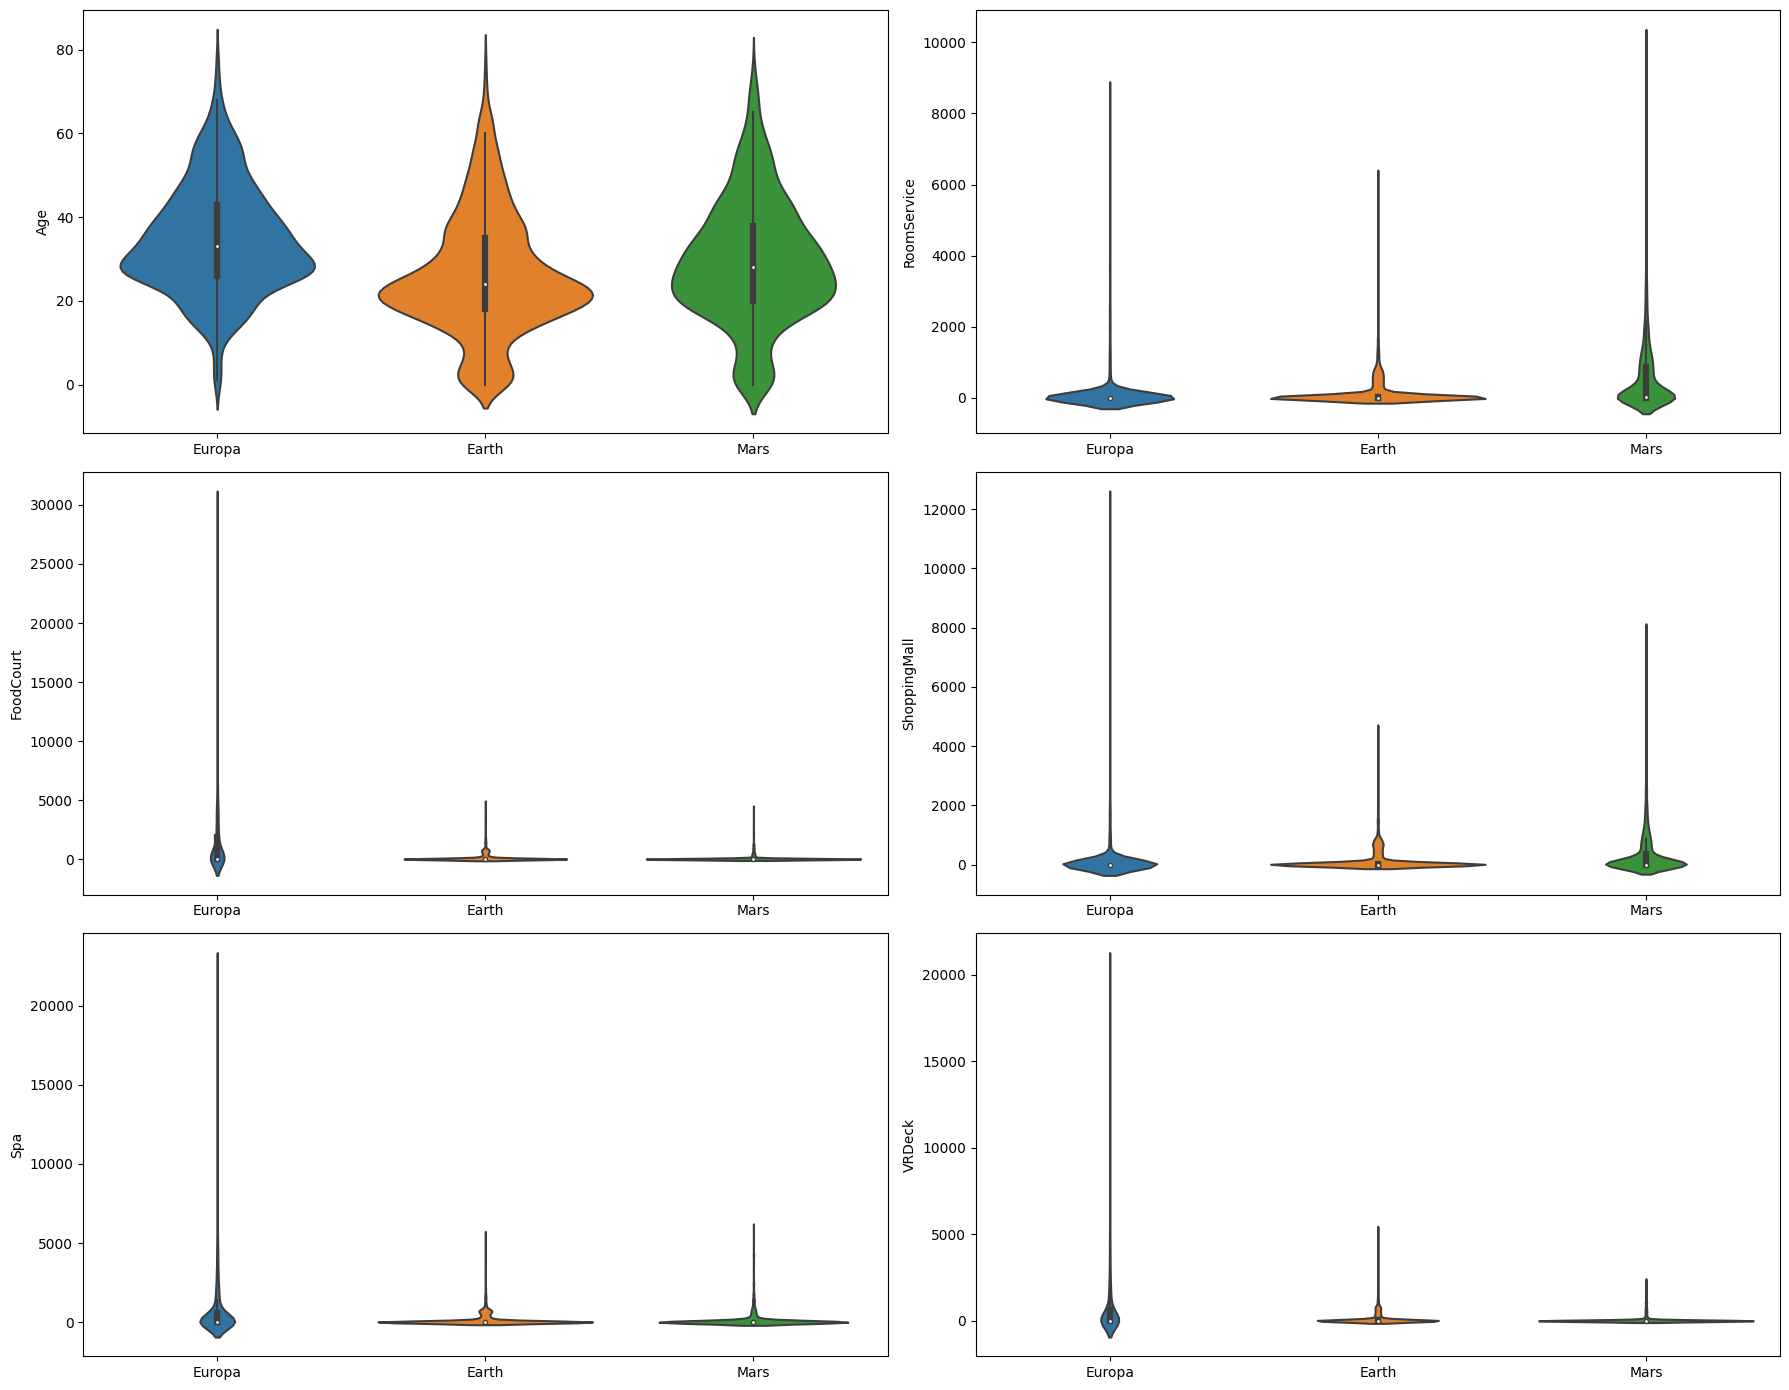

In [177]:
fig = plt.figure(1, (18, 14))
for idx,col in enumerate(nums):
    ax = plt.subplot(3, 2, idx+1)
    sns.violinplot(x='HomePlanet', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

Can't see much here but for example people from Europe are more varied in VRDeck usage than anyone else.
Maybe they are just richer? The same goes in usage of everything. The area under vialins are the same, so we measure density.

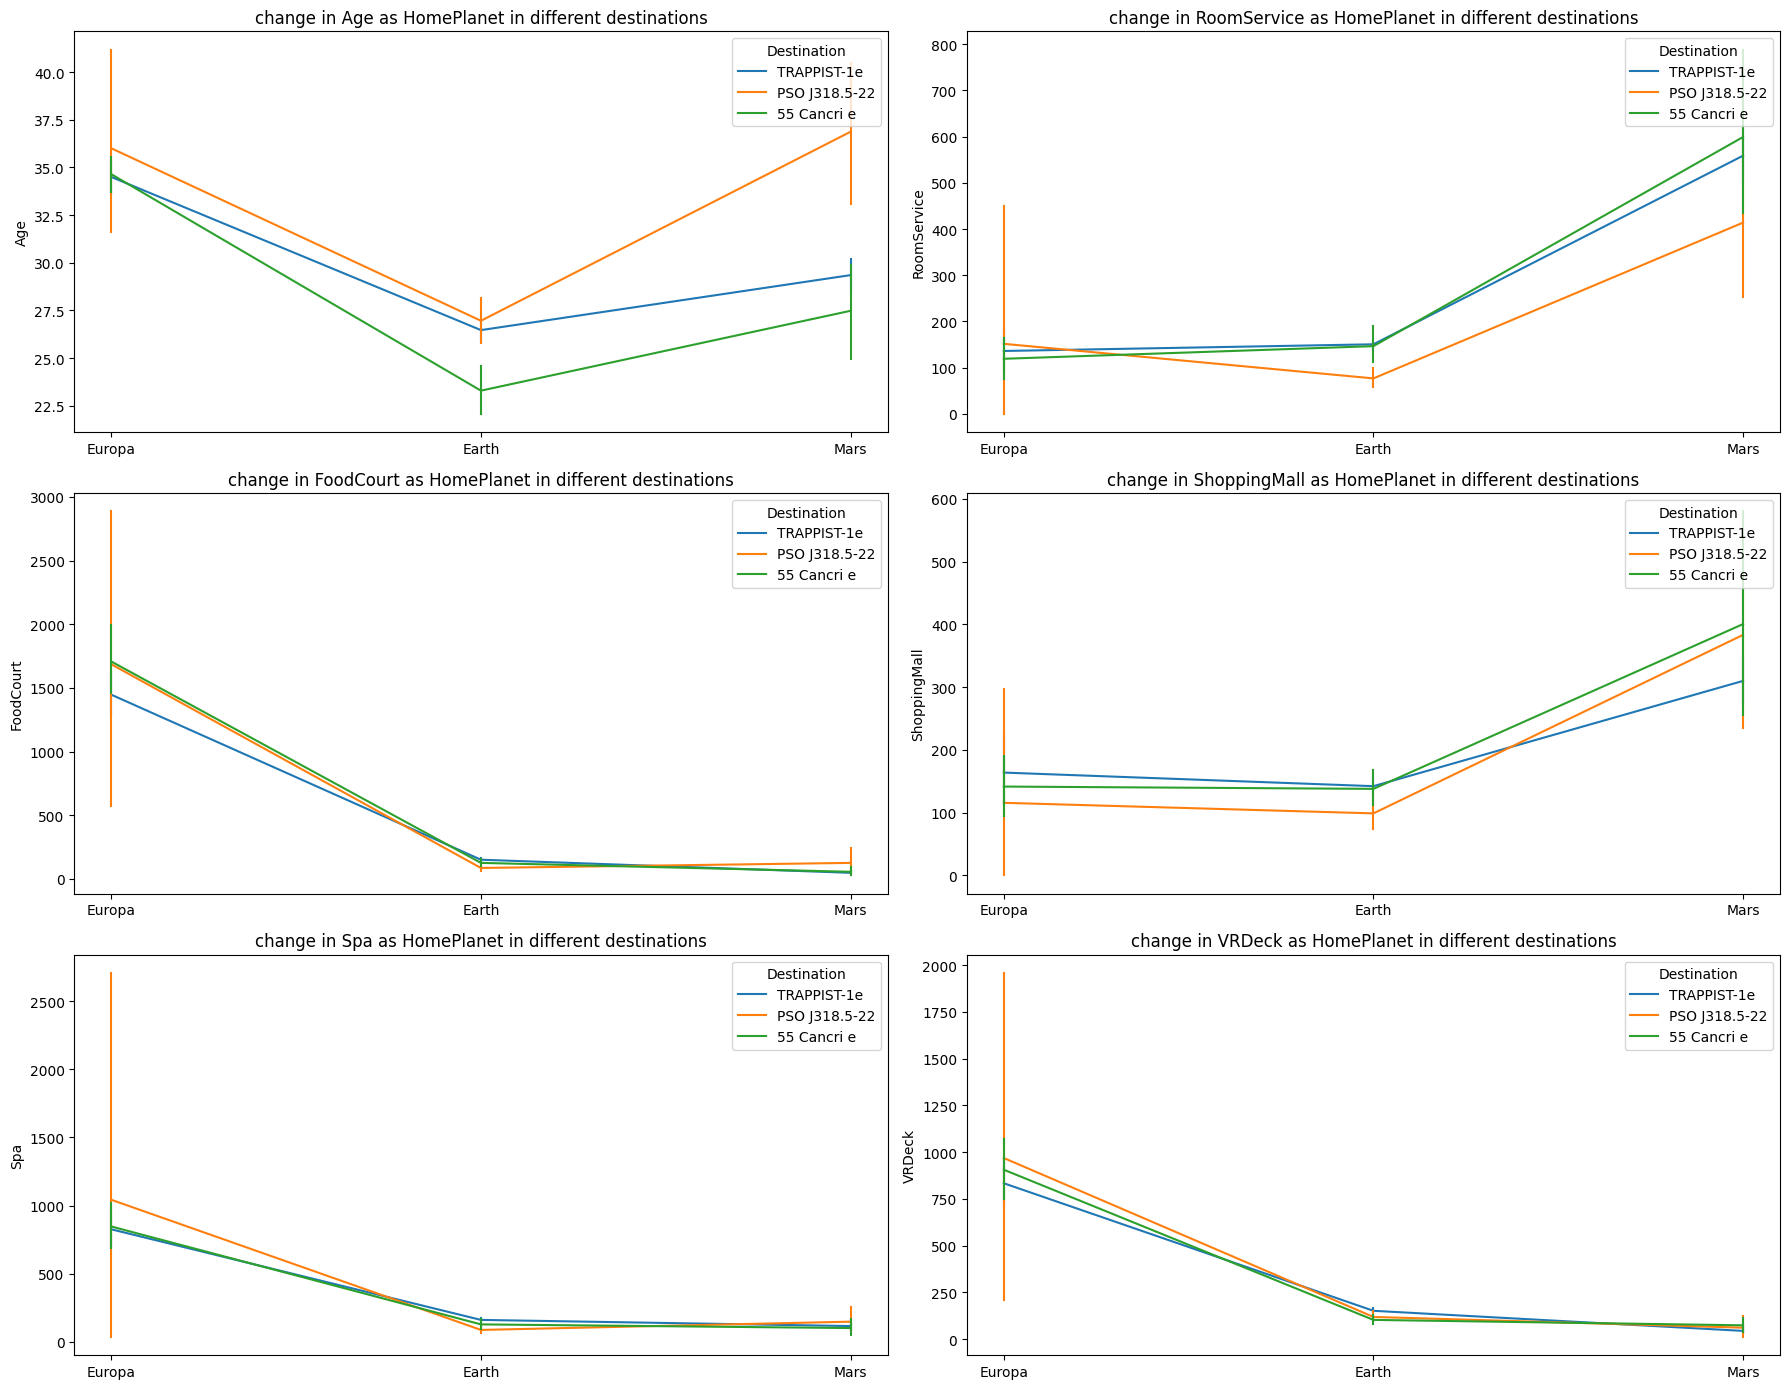

In [178]:
fig = plt.figure(1, (18, 14))

for idx,col in enumerate(nums):
    ax = plt.subplot(3, 2, idx+1)
    sns.lineplot(x="HomePlanet", y=col, hue='Destination', data=df, err_style='bars')
    ax.set_title(f'change in {col} as HomePlanet in different destinations')
    ax.set_xlabel(None)
    plt.tight_layout()

plt.show()

It makes no sense XD But just learnt how to plot it so it's fine. Maybe in different set of data :)

**I will leave statistical analysis for some other set of data, we will skip to the Machine Learning part**

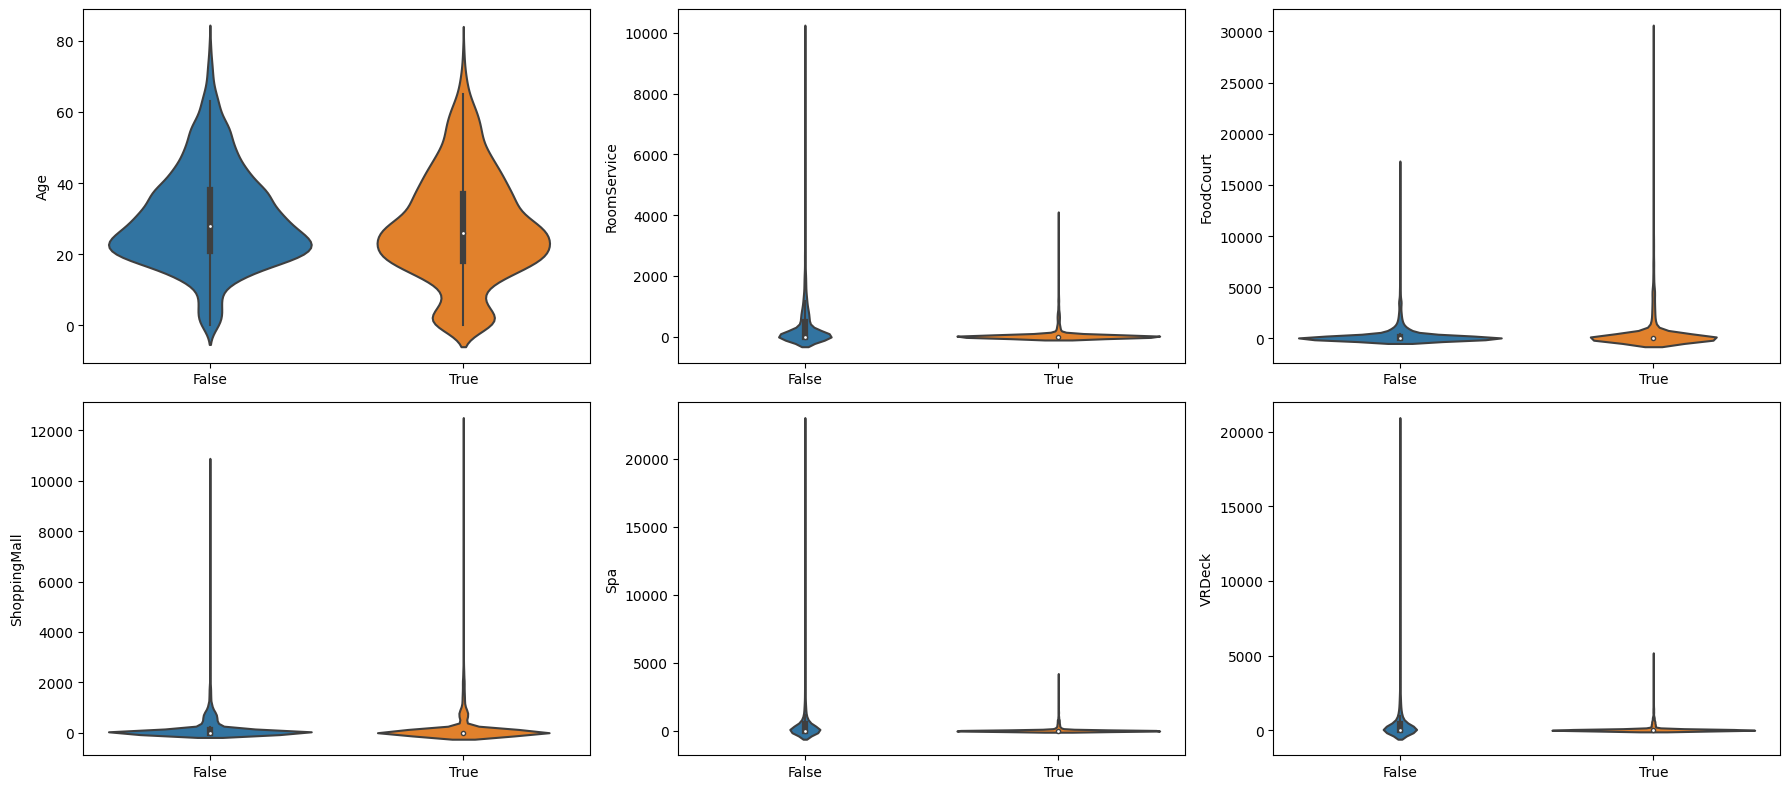

In [179]:
# Let's see again how dependent is result variable on each parameter:
fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.violinplot(x='Transported', y=col, data=df, width_method = 'area')
    ax.set_xlabel(None)
    plt.tight_layout()

In [180]:
df_cat.nunique()

PassengerId    6606
HomePlanet        3
CryoSleep         2
Cabin          5305
Destination       3
VIP               2
Name           6590
Transported       2
dtype: int64

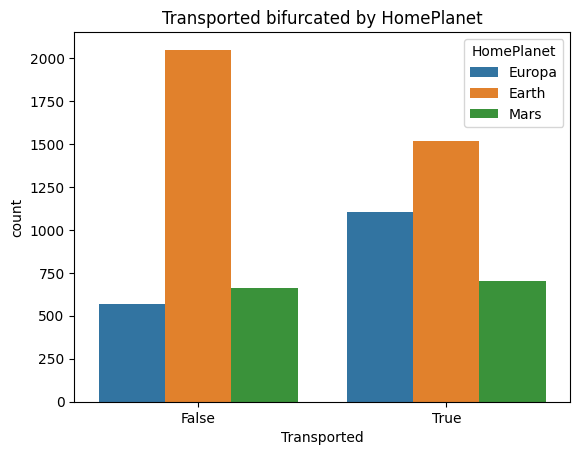

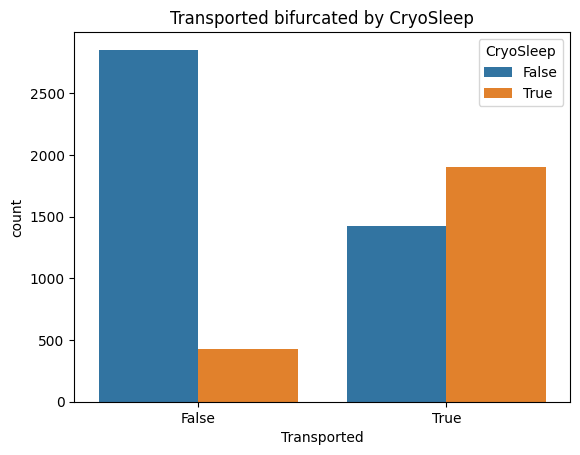

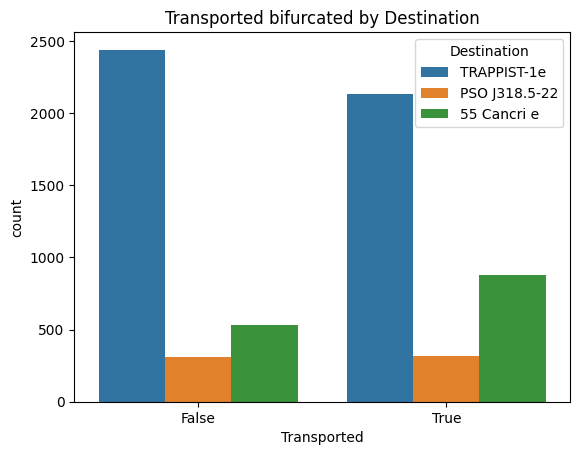

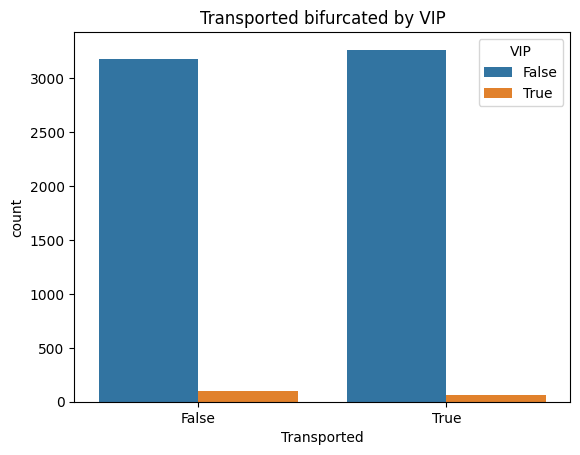

In [181]:
i= 0
for cat in df_cat.columns.drop(['Transported', 'PassengerId','Name','Cabin']):
    plt.figure(i)
    sns.countplot(x='Transported', hue=cat, data=df_cat).set(title = f'Transported bifurcated by {cat}')
    i+=1

We can exclude Cabin, PassengerId and Name. They are just too unique. 

From categorical variables we can see that VIP does not really affect Transported. Destination as well.

Seems like CryoSleep has the biggest affection. Also HomePlanet is quite big.

About numerical variables:

The change around 0 is because people in CryoSleep do not use anything.
The rest of distributions looks similar.


In [182]:
df_ml = df.drop(['PassengerId','Name','Cabin'], axis = 1)

In [183]:
df_ml.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [184]:
df_ml.isna().sum() # forgot I already did it :D

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Scaling age and normalizing the rest.

I standarize because it looks kinda like gaussian distribution.

The rest could be normalized because of the opposite, but I will choose robust scaling because of the outliers.

In [185]:
from sklearn.preprocessing import StandardScaler

# scaling by hand
df_ml['Age'] = (df_ml['Age'] - df_ml['Age'].mean()) / df_ml['Age'].std()

In [186]:
df_ml

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,0.695360,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,-0.336743,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,2.002691,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,0.282519,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,-0.887198,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.832974,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,-0.749585,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,-0.199130,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,0.213712,False,0.0,1049.0,0.0,353.0,3235.0,False


In [187]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
df_ml[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = scaler.fit_transform(
    df_ml[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
)

Now I will encode categorical. For now I won't use one-hot encoding but maybe would be better.

In [188]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Destination   6606 non-null   object 
 3   Age           6606 non-null   float64
 4   VIP           6606 non-null   object 
 5   RoomService   6606 non-null   float64
 6   FoodCourt     6606 non-null   float64
 7   ShoppingMall  6606 non-null   float64
 8   Spa           6606 non-null   float64
 9   VRDeck        6606 non-null   float64
 10  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 832.2+ KB


In [189]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df_ml[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = ordinal_encoder.fit_transform(df_ml[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']])

In [190]:
df_ml['Transported'] = np.where(df_ml['Transported'] == True, 1, 0)

In [191]:
df_ml

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,0.695360,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.0,2.0,-0.336743,0.0,2.224490,0.108761,0.833333,8.446154,0.846154,1
2,1.0,0.0,2.0,2.002691,1.0,0.877551,43.214502,0.000000,103.307692,0.942308,0
3,1.0,0.0,2.0,0.282519,0.0,0.000000,15.504532,12.366667,51.215385,3.711538,0
4,0.0,0.0,2.0,-0.887198,0.0,6.183673,0.845921,5.033333,8.692308,0.038462,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,0.832974,1.0,0.000000,82.404834,0.000000,25.276923,1.423077,0
8689,0.0,1.0,1.0,-0.749585,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
8690,0.0,0.0,2.0,-0.199130,0.0,0.000000,0.000000,62.400000,0.015385,0.000000,1
8691,1.0,0.0,0.0,0.213712,0.0,0.000000,12.676737,0.000000,5.430769,62.211538,0


In [192]:
pca_df = df_ml.drop(['Transported'], axis=1)

In [193]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(pca_df)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
# Create loadings
loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=pca_df.columns,  # and the rows are the original features
    )
    

In [194]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
HomePlanet,0.002472,0.005260,0.001863,0.000182,0.012964,0.214833,-0.188236,0.942398,-0.171604,-0.025426
CryoSleep,-0.005688,-0.006066,-0.001694,-0.001380,-0.008536,0.014941,0.062211,0.188226,0.979673,0.023886
Destination,-0.004065,0.001095,-0.001578,0.000448,0.003143,0.032193,-0.977421,-0.184754,0.096895,0.007713
Age,0.007010,0.002489,0.002914,0.002100,0.005519,0.975840,0.072732,-0.204612,0.020136,-0.008704
VIP,0.001098,0.000111,0.000126,-0.000199,0.000393,0.013357,0.001897,0.019124,-0.028353,0.999323
RoomService,-0.016639,0.078160,0.022633,0.032571,0.995861,-0.008414,0.005841,-0.009113,0.010653,0.000199
FoodCourt,0.592663,-0.059730,0.662885,-0.453324,0.014268,-0.005316,-0.003272,-0.001322,0.004260,-0.000601
ShoppingMall,-0.002310,0.992418,0.030432,-0.091583,-0.075743,-0.002752,0.001744,-0.002497,0.005803,0.000146
Spa,0.332353,0.070014,0.315332,0.885356,-0.036143,-0.005176,-0.001315,0.000082,0.003988,-0.000039
VRDeck,0.733420,0.021356,-0.678007,-0.034458,0.027057,-0.003335,-0.001621,0.000003,0.003573,-0.000591


In [195]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

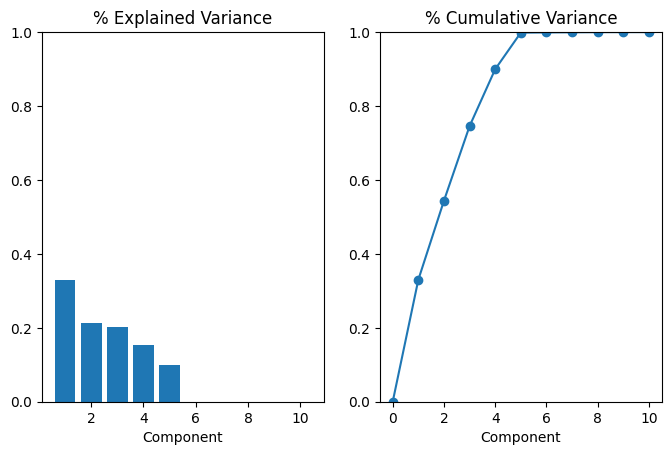

In [196]:
# let's just ommit this right now. 
plot_variance(pca)

In [197]:
y = df_ml['Transported']
X = df_ml.drop(['Transported'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [198]:
# playing with logistic regression
lregs = {}
lregs['Simple'] = LogisticRegression(max_iter=400)
lregs['l1'] = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=400)
lregs['l2'] = LogisticRegression(penalty = 'l2' , solver = 'newton-cg', max_iter=400)
lregs['ovr'] = LogisticRegression(multi_class = 'ovr', max_iter=400)

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy, precision, recall = {}, {}, {}

for key in lregs.keys():
    
    # Fit the classifier
    lregs[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = lregs[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [200]:
accuracy

{'Simple': 0.7851739788199698,
 'l1': 0.7859304084720121,
 'l2': 0.7851739788199698,
 'ovr': 0.7851739788199698}

In [201]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=600)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [202]:
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [203]:
accuracy

{'Logistic Regression': 0.7851739788199698,
 'Decision Trees': 0.74357034795764,
 'Random Forest': 0.7881996974281392,
 'Naive Bayes': 0.6959152798789713,
 'K-Nearest Neighbor': 0.7700453857791225}

In [204]:
predictions_final = models['Random Forest'].predict(X_test)

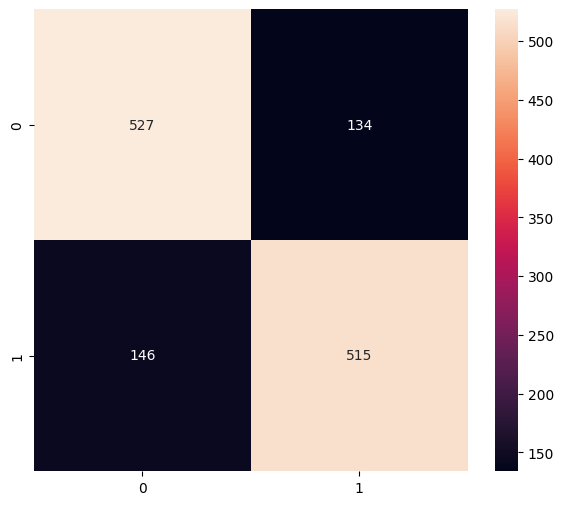

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       661
           1       0.79      0.78      0.79       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



In [205]:
from sklearn.metrics import confusion_matrix, classification_report
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

print_confusion_matrix(y_test, predictions_final)

In [206]:
tmp = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
ids = tmp['PassengerId']
tmp = tmp.drop(['PassengerId','Name','Cabin'],axis=1)

In [207]:
tmp['Age'] = (tmp['Age'] - tmp['Age'].mean()) / tmp['Age'].std()

scaler = RobustScaler() 
tmp[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = scaler.fit_transform(
    tmp[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
)

ordinal_encoder = OrdinalEncoder()

tmp[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = ordinal_encoder.fit_transform(
    tmp[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']])



In [208]:
tmp

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,2.0,-0.116943,0.0,0.000000,0.000000,0.000000,0.00,0.000000
1,0.0,0.0,2.0,-0.681155,0.0,0.000000,0.115385,0.000000,56.46,0.000000
2,1.0,1.0,0.0,0.165163,0.0,0.000000,0.000000,0.000000,0.00,0.000000
3,1.0,0.0,2.0,0.658848,0.0,0.000000,85.282051,0.000000,3.62,16.250000
4,0.0,0.0,2.0,-0.610629,0.0,0.188679,0.000000,19.242424,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...
4272,0.0,1.0,2.0,0.376742,0.0,0.000000,0.000000,0.000000,0.00,0.000000
4273,0.0,0.0,2.0,0.940954,0.0,0.000000,10.858974,0.515152,0.20,4.000000
4274,2.0,1.0,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.00,0.000000
4275,1.0,0.0,NaN,NaN,0.0,0.000000,34.358974,0.000000,0.00,14.527778


In [209]:
tmp['HomePlanet'] = tmp['HomePlanet'].fillna(0.0)
tmp['CryoSleep'] = tmp['CryoSleep'].fillna(0.0)
tmp['Age'] = tmp['Age'].fillna(np.mean(tmp['Age']))
tmp['VIP'] = tmp['VIP'].fillna(0.0)
tmp['Destination'] = tmp['Destination'].fillna(0.0)
tmp['RoomService'] = tmp['RoomService'].fillna(np.mean(tmp['RoomService']))
tmp['FoodCourt'] = tmp['FoodCourt'].fillna(np.mean(tmp['FoodCourt']))
tmp['ShoppingMall'] = tmp['ShoppingMall'].fillna(np.mean(tmp['ShoppingMall']))
tmp['Spa'] = tmp['Spa'].fillna(np.mean(tmp['Spa']))
tmp['VRDeck'] = tmp['VRDeck'].fillna(np.mean(tmp['VRDeck']))

In [210]:
tmp.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [213]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': models['Random Forest'].predict(tmp)})
output.to_csv('/kaggle/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [212]:
output

,PassengerId,Survived
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [214]:
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/submission.csv
/kaggle/lib/kaggle/gcp.py
/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
/kaggle/working/submission.csv
